In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
import requests,os
from bs4 import BeautifulSoup

In [2]:
# GoogLe 搜尋結果
google_url = 'https://www.google.com.tw/search'

#查詢參數
my_params = {'q': '現代戰爭'}

#下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

#確認是否下載成功
if r.status_code == requests.codes.ok:
    #以 BeartifulSoup 解析HTML 原始碼
    soup = BeautifulSoup(r.text, 'html.parser')

    #以CSS 的選擇器來抓取 Google 的搜尋結果 => items = soup.select('div.上面抓到的class名稱 > a[href^="/url"]')
    items = soup.select('div.kCrYT > a[href^="/url"]')
    
    #你各位啊，總之就是改這裡，把原本一個一個輸出(i.text)的全部合到一個text裡面
    text=''
    for i in items:
        text = text + i.text
    print(text)

《決勝時刻》: 現代戰爭 - Battle.nethttps://tw.shop.battle.net › zh-tw › product › call-of-duty-modern-warfare決勝時刻：現代戰爭 - CallofDuty.comhttps://www.callofduty.com › modernwarfare《現代戰爭》地獄BUG讓你體會「這種痛苦還要持續多久」的死亡| 4Gamershttps://www.4gamers.com.tw › news › detail › call-of-duty-modern-warfar...十年前的《決勝時刻：現代戰爭》並不「浪漫」，「No Russian」的影響至今 ...https://www.4gamers.com.tw › war-video-games-didnt-romanticize-warGeforce RTX《決勝時刻: 現代戰爭(Call of Duty: Modern Warfare) 》同 ...https://www.nvidia.com › zh-tw › geforce › campaigns › call-of-duty-mod...使命召喚：現代戰爭(2019年遊戲) - 維基百科，自由的百科全書https://zh.wikipedia.org › zh-hant › 使命召唤：现代战争_(2019年游戏)《決勝時刻：現代戰爭》中文一般版- 巴哈姆特https://buy.gamer.com.tw › PlayStation4《決勝時刻：現代戰爭》如果玩家不斷射擊嬰兒，將收到特殊訊息| 遊戲 ...https://game.udn.com › udn遊戲角落 › 找新聞《決勝時刻®：現代戰爭®》 – 故事劇情預告片[TCH] - YouTubehttps://www.youtube.com › watch遭大量負評洗版，只因《決勝時刻：現代戰爭》劇情俄國士兵是壞人https://tw.esports.yahoo.com › russianisbadmw-053454075


Building prefix dict from C:\Users\K410\Desktop\ex11-wordcloud\ex11-2\prg\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.uf5f642cf4255e8d857325de8c9aed437.cache
Loading model cost 1.044 seconds.
Prefix dict has been built succesfully.


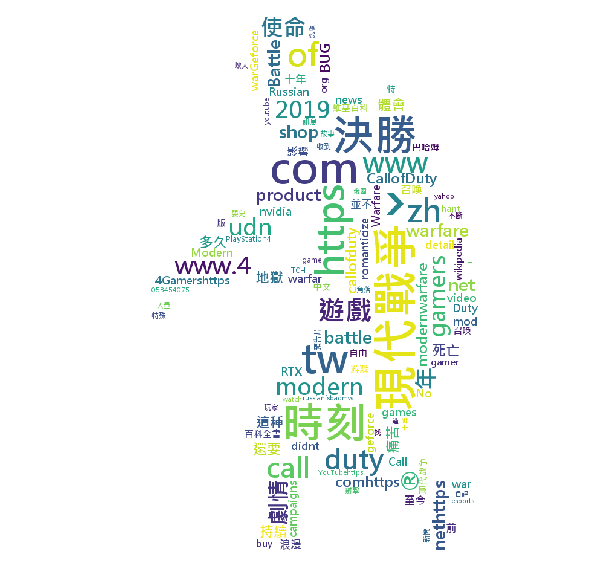

In [3]:
#text = open('prg/news.txt', "r",encoding="utf-8").read() #讀文字資料

jieba.set_dictionary('prg/dict.txt.big.txt')
with open('prg/stopword.txt', "r", encoding='utf-8-sig') as f: #設定停用慈
    stops = f.read().split('\n')
terms = [] #儲存字詞
for t in jieba.cut(text, cut_all=False): #拆解句子為字詞
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
#可列印詞的統計數量
#print(diction)

font = "prg\\msjhbd.ttc" #設定字型(粗黑)
#wordcloud = WordColud(font_path=".......")

mask = np.array(Image.open("prg/Warfare.png")) #設定文字雲形狀
#wordcloud = wordcloud(font_path=font)
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font) #背景顏色預設為黑色，改為白色
wordcloud.generate_from_frequencies(diction) #產生文字雲

#產生圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("NewsWordcloud.png") #存檔